<a href="https://colab.research.google.com/github/DanielaJim07/INVESTIGACION_OPERAC/blob/main/CANTIDAD_ECONOMICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cantidad económica de pedido de varios artículos con limitación de almacén

In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize


## Definición de los datos del problema

En este bloque se definen los parámetros del Ejemplo 11.2-3 del libro *Investigación de Operaciones* de Taha (séptima edición).  
Los datos corresponden a tres artículos en inventario e incluyen costos de preparación, demandas, costos de mantenimiento, área requerida por unidad y el área total disponible de almacenamiento.


In [2]:

# Datos del problema
K = np.array([10, 5, 15])      # Costos de preparación
D = np.array([4, 3, 4])        # Demandas
h = np.array([0.30, 0.10, 0.20])  # Costos de mantenimiento
a = np.array([1, 1, 1])        # Área por unidad
A = 25                         # Área total disponible

n = len(K)


## Paso 1: Cálculo de las cantidades óptimas no restringidas

Se calcula la cantidad económica de pedido para cada artículo sin considerar la restricción de almacenamiento.  
Se utiliza la fórmula clásica del EOQ individual:
$$
y_i^* = \sqrt{\frac{2K_iD_i}{h_i}}
$$
Esta solución representa el óptimo teórico cuando no existe limitación de espacio.


In [3]:
# PASO 1: EOQ sin restricción

y_unrestricted = np.sqrt(2 * K * D / h)

print("Paso 1: Cantidades óptimas sin restricción")
for i in range(n):
    print(f"Artículo {i+1}: y* = {y_unrestricted[i]:.4f}")

# Verificar restricción
area_used = np.sum(a * y_unrestricted)
print("\nÁrea utilizada:", area_used)
print("Área disponible:", A)


Paso 1: Cantidades óptimas sin restricción
Artículo 1: y* = 16.3299
Artículo 2: y* = 17.3205
Artículo 3: y* = 24.4949

Área utilizada: 58.14533712207508
Área disponible: 25


## Paso 2: Verificación de la restricción de almacenamiento

En este bloque se evalúa si las cantidades óptimas no restringidas satisfacen la restricción de almacenamiento:
$$
\sum a_i y_i \le A
$$
Si la restricción se cumple, la solución sin restricción es óptima.  
En caso contrario, es necesario aplicar el método de Lagrange para encontrar la solución restringida.


In [4]:
# PASO 2: Verificación

if area_used <= A:
    print("\nLa solución sin restricción es factible y óptima.")
else:
    print("\nLa solución sin restricción NO es factible.")



La solución sin restricción NO es factible.


## Paso 3: Aplicación del método de Lagrange

Dado que la solución no restringida no cumple la restricción de almacenamiento, se formula la función Lagrangiana del problema.  
A partir de las condiciones de primer orden se obtiene una expresión para las cantidades de pedido en función del multiplicador de Lagrange:
$$
y_i(\lambda) = \sqrt{\frac{2K_iD_i}{h_i - 2\lambda a_i}}
$$
El valor de $ \lambda $ se determina numéricamente para que la restricción se satisfaga en forma de igualdad.


In [5]:
# PASO 3: Resolver λ

def area_constraint(lambda_val):
    """
    Restricción de almacenamiento en forma de ecuación:
    sum(a_i * y_i(lambda)) - A = 0
    """
    y = np.sqrt((2 * K * D) / (h - 2 * lambda_val * a))
    return np.sum(a * y) - A


# Resolver para lambda (lambda < 0)
result = minimize(
    lambda x: abs(area_constraint(x[0])),
    x0=[-0.01],
    bounds=[(-10, -1e-6)]
)

lambda_opt = result.x[0]
print("Lambda óptimo:", lambda_opt)


Lambda óptimo: -0.4103474093134104


## Determinación numérica del multiplicador de Lagrange

En este bloque se utiliza el método de optimización de `scipy.optimize` para encontrar el valor óptimo del multiplicador de Lagrange.  
El objetivo es encontrar el valor de $ \lambda < 0 $ que haga que el área total utilizada sea exactamente igual al área disponible.


In [6]:
# Cantidades óptimas con restricción
y_restricted = np.sqrt((2 * K * D) / (h - 2 * lambda_opt * a))

print("\nCantidades óptimas con restricción:")
for i in range(n):
    print(f"Artículo {i+1}: y* = {y_restricted[i]:.4f}")

print("\nÁrea utilizada:", np.sum(a * y_restricted))



Cantidades óptimas con restricción:
Artículo 1: y* = 8.4489
Artículo 2: y* = 5.7082
Artículo 3: y* = 10.8428

Área utilizada: 24.99999996131863


## Cálculo del costo total mínimo del inventario

En este bloque se evalúa la función de costo total utilizando las cantidades óptimas restringidas.  
El valor obtenido representa el costo mínimo anual del sistema de inventarios bajo la limitación de espacio disponible.


In [7]:
# Costo total
def total_cost(y):
    return np.sum(K * D / y + h * y / 2)

print("\nCosto total mínimo:")
print(total_cost(y_restricted))



Costo total mínimo:
15.532752702856174


## Gráfica de curvas de nivel del costo total con restricción

En esta gráfica se muestran las curvas de nivel del costo total del sistema de inventarios para dos artículos.  
La recta representa la restricción de almacenamiento y el punto marcado indica la solución óptima restringida.  
La gráfica ilustra geométricamente el método de Lagrange, donde el mínimo ocurre en el punto de tangencia entre una curva de nivel y la restricción.


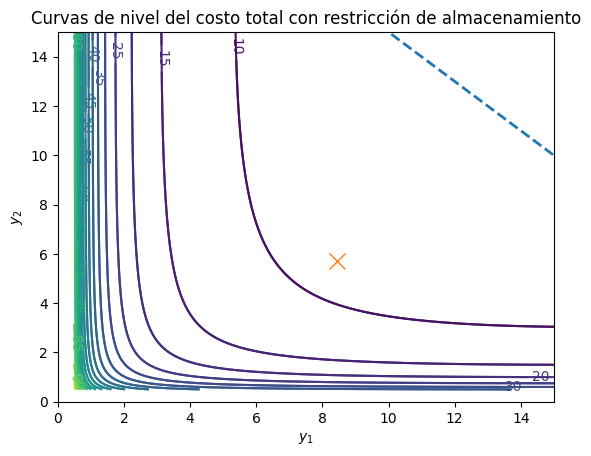

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# función de costo total

def costo(y1, y2):
    return (K[0]*D[0]/y1 + h[0]*y1/2) + (K[1]*D[1]/y2 + h[1]*y2/2)


# Mallado para curvas de nivel

y1 = np.linspace(0.5, 15, 300)
y2 = np.linspace(0.5, 15, 300)
Y1, Y2 = np.meshgrid(y1, y2)

Z = costo(Y1, Y2)


# Restricción de almacenamiento
# a1*y1 + a2*y2 = A

y2_restriccion = (A - a[0]*y1) / a[1]


# Punto óptimo restringido
y1_opt = y_restricted[0]
y2_opt = y_restricted[1]


# GRÁFICA

plt.figure()

# Curvas de nivel
plt.contour(Y1, Y2, Z, levels=20)
plt.clabel(plt.contour(Y1, Y2, Z, levels=20), inline=True)

# Restricción
plt.plot(y1, y2_restriccion, linestyle='--', linewidth=2)

# Punto óptimo
plt.plot(y1_opt, y2_opt, marker='x', markersize=12)

plt.xlabel(r"$y_1$")
plt.ylabel(r"$y_2$")
plt.title("Curvas de nivel del costo total con restricción de almacenamiento")

plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
